<a href="https://colab.research.google.com/github/mayurjadhav2002/time-series-forecasting/blob/main/time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

In [6]:
df = pd.read_csv("/content/Train_SU63ISt.csv")

In [7]:
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [9]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


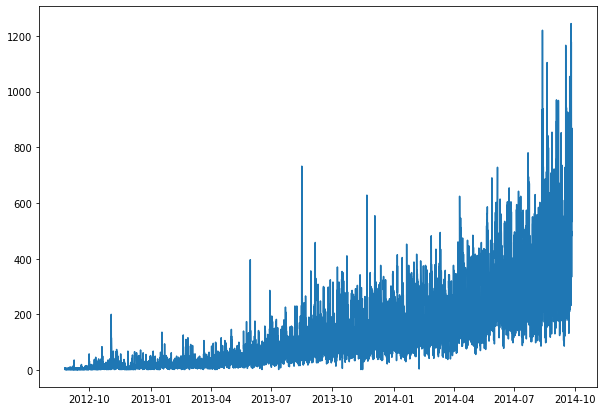

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(df['Datetime'], df['Count'])
plt.show()

In [11]:
df.index = df['Datetime']
df['y'] = df['Count']
df.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)
df = df.resample('D').sum()
df.head()

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [12]:
df['ds'] = df.index

In [13]:
df.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


In [17]:
size = 60
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=size/len(df), shuffle=False)

In [19]:
train.tail()

,y,ds
Datetime,,
2014-07-23,10130,2014-07-23
2014-07-24,8156,2014-07-24
2014-07-25,7192,2014-07-25
2014-07-26,6562,2014-07-26
2014-07-27,6094,2014-07-27


In [20]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = model.make_future_dataframe(periods=60)
future

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24


In [22]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-480.341013,-1846.074363,106.498971,-480.341013,-480.341013,-342.223019,-342.223019,-342.223019,-846.081691,-846.081691,-846.081691,503.858671,503.858671,503.858671,0.0,0.0,0.0,-822.564032
1,2012-08-26,-473.314822,-1885.240968,23.214360,-473.314822,-473.314822,-457.919637,-457.919637,-457.919637,-967.034704,-967.034704,-967.034704,509.115067,509.115067,509.115067,0.0,0.0,0.0,-931.234459
2,2012-08-27,-466.288631,-534.245203,1381.992865,-466.288631,-466.288631,944.030819,944.030819,944.030819,431.150091,431.150091,431.150091,512.880728,512.880728,512.880728,0.0,0.0,0.0,477.742189
3,2012-08-28,-459.262439,-494.653922,1469.153590,-459.262439,-459.262439,954.781861,954.781861,954.781861,439.514265,439.514265,439.514265,515.267596,515.267596,515.267596,0.0,0.0,0.0,495.519421
4,2012-08-29,-452.236248,-492.633859,1437.700311,-452.236248,-452.236248,916.107106,916.107106,916.107106,399.712551,399.712551,399.712551,516.394555,516.394555,516.394555,0.0,0.0,0.0,463.870858


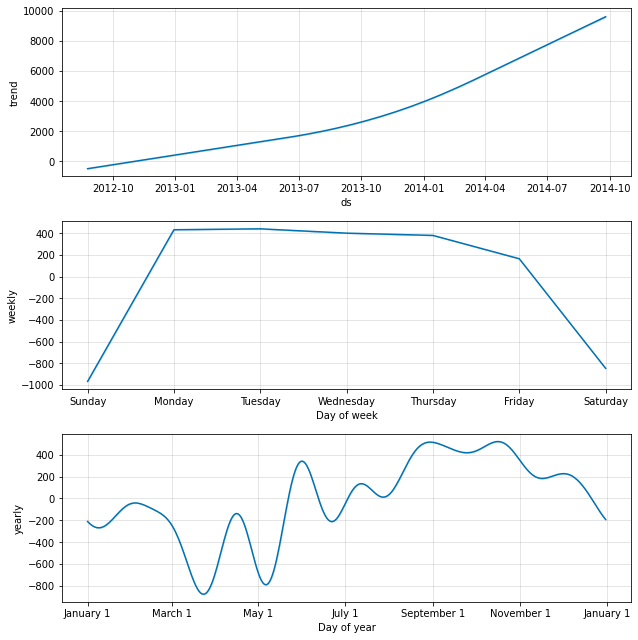

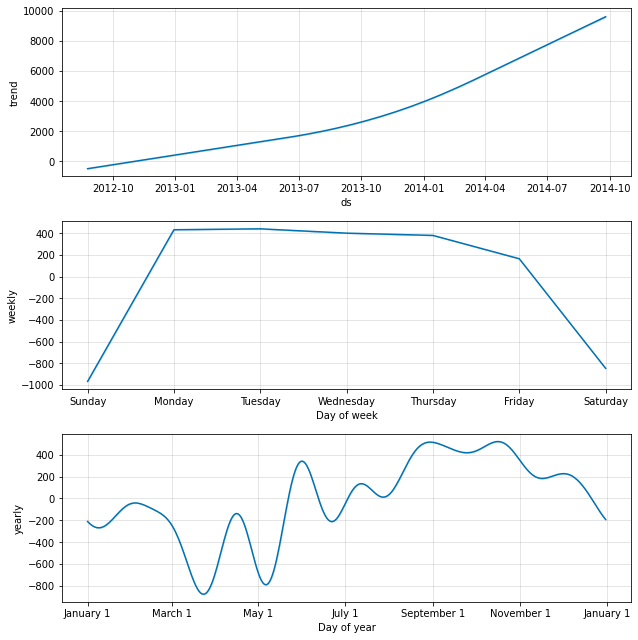

In [23]:
model.plot_components(forecast)

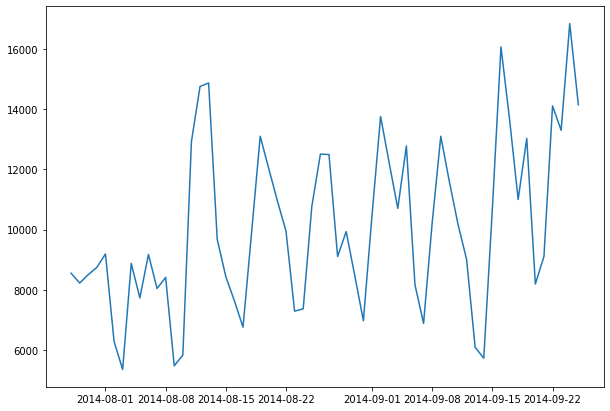

In [24]:
plt.figure(figsize=(10,7))
plt.plot(test['ds'],test['y'])
plt.show()

In [25]:
pred = forecast.iloc[-60:, :]
len(pred)

60

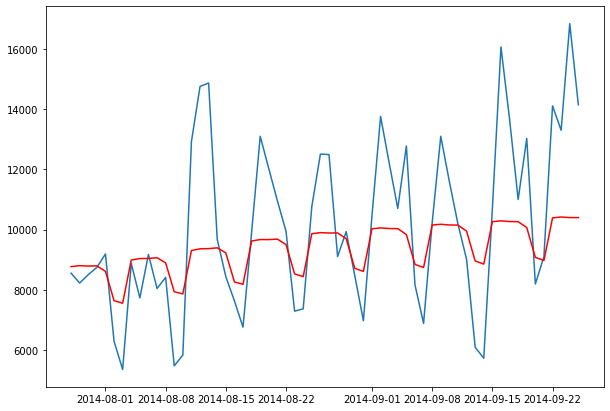

In [27]:
plt.figure(figsize=(10,7))
plt.plot(test['ds'],test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.show()

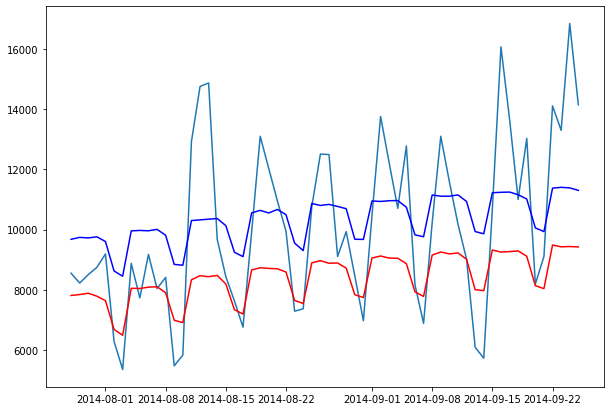

In [28]:
plt.figure(figsize=(10,7))
plt.plot(test['ds'],test['y'])
plt.plot(pred['ds'], pred['yhat_lower'], color='red')
plt.plot(pred['ds'], pred['yhat_upper'], color='blue')
plt.show()

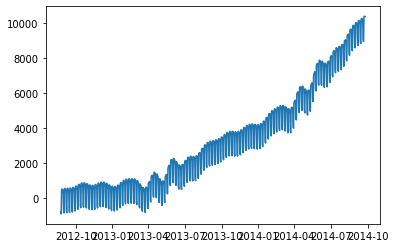

In [29]:
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [33]:
from fbprophet import Prophet
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df)
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-691.413088,-2253.820855,46.861516,-691.413088,-691.413088,-423.432144,-423.432144,-423.432144,-995.120367,-995.120367,-995.120367,571.688223,571.688223,571.688223,0.0,0.0,0.0,-1114.845232
1,2012-08-26,-683.288701,-2441.829014,32.120574,-683.288701,-683.288701,-581.426591,-581.426591,-581.426591,-1144.187184,-1144.187184,-1144.187184,562.760593,562.760593,562.760593,0.0,0.0,0.0,-1264.715292
2,2012-08-27,-675.164314,-768.444457,1594.131090,-675.164314,-675.164314,1008.545650,1008.545650,1008.545650,457.575538,457.575538,457.575538,550.970112,550.970112,550.970112,0.0,0.0,0.0,333.381336
3,2012-08-28,-667.039926,-741.977197,1622.778333,-667.039926,-667.039926,1145.477035,1145.477035,1145.477035,608.350482,608.350482,608.350482,537.126553,537.126553,537.126553,0.0,0.0,0.0,478.437108
4,2012-08-29,-658.915539,-795.716345,1635.013538,-658.915539,-658.915539,1078.945696,1078.945696,1078.945696,556.887062,556.887062,556.887062,522.058634,522.058634,522.058634,0.0,0.0,0.0,420.030157
